In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
bli = pd.read_csv("oecd_bli_2015.csv",thousands=',')
gdp = pd.read_csv("gdp_per_capita.csv",thousands=',', encoding='latin1', na_values="n/a")

In [3]:
gdp.loc[gdp["Country"]=="Australia"]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
7,Australia,Gross domestic product per capita current prices,U.S. dollars,Units,See notes for: Gross domestic product current...,50961.865,2014.0


In [4]:
bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [5]:
bli = bli[(bli['Inequality'] == 'Total') &
                    (bli['Indicator'] == 'Life expectancy')]

combined_data = pd.merge(gdp, bli, on=['Country'])

gdp_value = combined_data[['2015']].copy()
bli_value = combined_data[['Value']].copy()

gdp_value.columns = ['GDP per capita']
bli_value.columns = ['Life satisfaction']

country_stats = pd.concat([gdp_value, bli_value], axis=1)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [6]:
country_stats

,GDP per capita,Life satisfaction
0,50961.865,82.1
1,43724.031,81.0
2,40106.632,80.5
3,8669.998,73.7
4,43331.961,81.5
5,13340.905,78.9
6,17256.918,78.2
7,52114.165,80.1
8,17288.083,76.5
9,41973.988,80.7


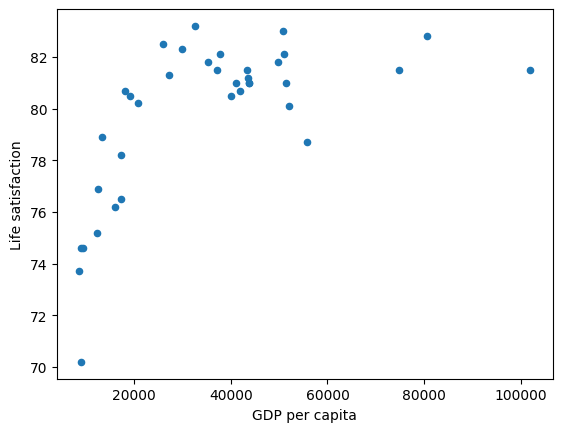

In [7]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [8]:
model = linear_model.LinearRegression()

In [9]:
model.fit(X,y)

LinearRegression()

In [10]:
print(model.predict([[101994]] ))

[[85.61047957]]
